For Text Mining assignment
 
 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [1]:
!pip install -U textblob

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# # importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import wordcloud
from wordcloud import WordCloud 

In [2]:
#importing the dataset
data=pd.read_csv("Elon_musk.csv", encoding='latin-1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
#droping unwanted column
data=data.drop('Unnamed: 0',axis=1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
#Check the various attributes of data like shape(rows and cols),columns,datatypes
data.shape

(1999, 1)

In [7]:
#The data information to know how many missing values available in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [8]:
# missing value by applying function
data.isnull().sum()

Text    0
dtype: int64

In [12]:
# checking duplicate rows
# dataset has 2 duplicate tweets ,so we need to drop them.
data.duplicated().sum()


0

In [10]:
# droping duplicate rows
data=data.drop_duplicates()

In [11]:
len(data.Text.unique())

1997

In [14]:
# number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].tail(10)

,Text,word_count
1989,"@buzzindelhi Sorry, should hopefully be soon!",6
1990,"@kenyanwalstreet Not actually a payout, just a...",22
1991,@IheartTesla No easy way to answer this in a t...,23
1992,AI symbiosis while u wait,5
1993,@vistacruiser7 @flcnhvy Theres some of that too,7
1994,"@flcnhvy True, it sounds so surreal, but the n...",23
1995,@PPathole Make sure to read ur terms &amp; con...,12
1996,@TeslaGong @PPathole Samwise Gamgee,4
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,7
1998,Progress update August 28,4


we can see that the number of words are showing on the right side

In [15]:
# number of characters in single tweet
data['char_count'] = data['Text'].str.len()
data[['Text','char_count']].head(10)

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,49
6,"Frodo was the underdoge,\nAll thought he would...",96
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),46
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,89
9,The most entertaining outcome is the most likely,48


In [16]:
#the average word
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head(10)

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,6.142857
6,"Frodo was the underdoge,\nAll thought he would...",5.928571
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6.833333
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,7.181818
9,The most entertaining outcome is the most likely,5.125000


In [17]:
#the number of stop words

stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head(10)


,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,2
6,"Frodo was the underdoge,\nAll thought he would...",5
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,2
9,The most entertaining outcome is the most likely,4


In [18]:
# the number of special characters
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head(10)

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),3
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,2
9,The most entertaining outcome is the most likely,0


In [19]:
#numerical values
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head(10)

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,0


In [20]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head(10)

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,0


In [21]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [22]:
#Removing punctuation
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_5364\3940707309.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [23]:
#Removing stop words
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [24]:
#Removing common words
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [25]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [26]:
#Removing rare words
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [27]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [28]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [29]:
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [30]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [31]:
import nltk
nltk.download('wordnet')

data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

[nltk_data] Downloading package wordnet to C:\Users\Anup
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [32]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

In [33]:
t1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
t1.columns = ['words','tf']
t1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


In [35]:
for i,word in enumerate(t1['words']):
  t1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

t1

,words,tf,idf
0,id_aa_carmack,1,4.165414
1,ray,1,5.034452
2,tracing,1,7.599401
3,cyberpunk,1,5.114495
4,hdr,1,6.906254
5,nextlevel,1,6.906254
6,tried,1,5.807642


In [36]:
t1['tfidf'] = t1['tf'] * t1['idf']
t1


,words,tf,idf,tfidf
0,id_aa_carmack,1,4.165414,4.165414
1,ray,1,5.034452,5.034452
2,tracing,1,7.599401,7.599401
3,cyberpunk,1,5.114495,5.114495
4,hdr,1,6.906254,6.906254
5,nextlevel,1,6.906254,6.906254
6,tried,1,5.807642,5.807642


In [37]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1997x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7370 stored elements in Compressed Sparse Row format>

In [38]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1997x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8015 stored elements in Compressed Sparse Row format>

In [39]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

# Sentiment analysis

In [40]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head(10)

,Text,sentiment
0,kunalb11 im alien,-0.250000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000
2,joerogan spotify interview,0.000000
3,gtera27 doge underestimated,0.000000
4,teslacn congratulation china amazing execution...,0.200000
5,happy new year ox httpstco9wfkmyu2oj,0.468182
6,frodo underdoge thought would fail httpstcozgx...,-0.500000
7,owensparks_ anonyx10 haha thanks,0.200000
8,anonyx10 indeed tweet definitely represent rea...,0.000000
9,entertaining outcome likely,0.250000


# Positive words wordcloud

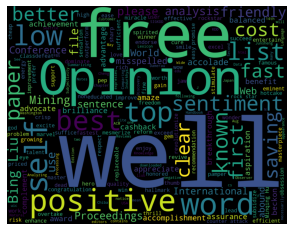

In [41]:
from wordcloud import WordCloud, STOPWORDS
file_content=open ("positive-words.txt").read()
wordcloud = WordCloud(background_color='black',
                     width=1800,
                     height=1400).generate(file_content)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Negative words wordcloud

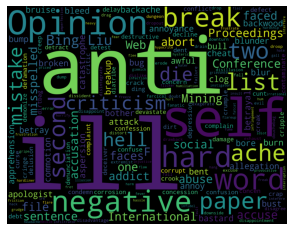

In [43]:
from wordcloud import WordCloud, STOPWORDS
file_content=open ("negative-words.txt").read()

wordcloud = WordCloud(background_color ='black',
                     width=1800,
                     height=1400).generate(file_content)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# TWO:
1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

In [44]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [45]:
#Looping through multiple pages
def get_soup(url):
    r = requests.get(url,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [46]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [47]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Samsung-Galaxy-Ultra-Green-Storage/dp/B0BT9CXXXX/ref=sr_1_1_sspa?crid=162SEXMCWJGMG&keywords=samsung+s23+ultra+5g&qid=1680609180&sprefix=samsung%2Caps%2C386&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\Anup sharma\AppData\Local\Temp\ipykernel_5364\1309506063.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [73]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,product,date,title,rating,body
0,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 8 March 2023,True flagship performance and excellent overal...,4.0,The media could not be loaded.\n ...
1,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 1 April 2023,Value for money,4.0,Best picture qualityFast charging missing\nRea...
2,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 13 March 2023,I like it.. but not love it.,4.0,I bought it a week ago.. i upgraded from my o...
3,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
4,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
...,...,...,...,...,...
299,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
300,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
301,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 24 March 2023,"Product was good, but amazon service was wors...",4.0,"Product was good, but amazon service was wors..."
302,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 7 March 2023,Awesome 😎,4.0,"Pros: excellent look and feel , I've always wa..."


In [74]:
df.to_csv("Amazon_Reviews.csv")

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
reviews=pd.read_csv("Amazon_Reviews.csv")
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,product,date,title,rating,body
0,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 8 March 2023,True flagship performance and excellent overal...,4.0,The media could not be loaded.\n ...
1,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 1 April 2023,Value for money,4.0,Best picture qualityFast charging missing\nRea...
2,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 13 March 2023,I like it.. but not love it.,4.0,I bought it a week ago.. i upgraded from my o...
3,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
4,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
...,...,...,...,...,...
299,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 28 February 2023,The perfect beast,5.0,This phone is a pefect upgrade from my old One...
300,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 19 March 2023,Best compact phone with all premium features,4.0,"Phone does the job, with all the features work..."
301,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 24 March 2023,"Product was good, but amazon service was wors...",4.0,"Product was good, but amazon service was wors..."
302,"Samsung Galaxy S23 Ultra 5G (Green, 12GB, 256G...",Reviewed in India 🇮🇳 on 7 March 2023,Awesome 😎,4.0,"Pros: excellent look and feel , I've always wa..."


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  304 non-null    object 
 1   date     304 non-null    object 
 2   title    304 non-null    object 
 3   rating   304 non-null    float64
 4   body     304 non-null    object 
dtypes: float64(1), object(4)
memory usage: 12.0+ KB


In [4]:
#Cleaning up the Dates and making a seperate columns for country
reviews.date = reviews.date.apply(lambda x : x.replace('Reviewed in ',''))
reviews.date = reviews.date.apply(lambda x : re.sub(r"on ", "", x))

# for Country
reviews["country"] = reviews.date.apply(lambda x : x.split(' ',1)[0])

#splitting date
reviews.date = reviews.date.apply(lambda x : x.split(' ',1)[1])

In [6]:
reviews1 = reviews.copy() #we do not need content and name so we can remove it
reviews1=reviews1.drop(['product','body'],axis=1)
reviews1 #We can perform 

,date,title,rating,country
0,🇮🇳 8 March 2023,True flagship performance and excellent overal...,4.0,India
1,🇮🇳 1 April 2023,Value for money,4.0,India
2,🇮🇳 13 March 2023,I like it.. but not love it.,4.0,India
3,🇮🇳 28 February 2023,The perfect beast,5.0,India
4,🇮🇳 19 March 2023,Best compact phone with all premium features,4.0,India
...,...,...,...,...
299,🇮🇳 28 February 2023,The perfect beast,5.0,India
300,🇮🇳 19 March 2023,Best compact phone with all premium features,4.0,India
301,🇮🇳 24 March 2023,"Product was good, but amazon service was wors...",4.0,India
302,🇮🇳 7 March 2023,Awesome 😎,4.0,India


# Remove StopWords

In [7]:
reviews1.title = reviews1.title.apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
reviews1.head() #No need to perform stemming or lematization as titles are almost small and short

,date,title,rating,country
0,🇮🇳 8 March 2023,True flagship performance excellent overall (h...,4.0,India
1,🇮🇳 1 April 2023,Value money,4.0,India
2,🇮🇳 13 March 2023,I it.. love it.,4.0,India
3,🇮🇳 28 February 2023,The perfect beast,5.0,India
4,🇮🇳 19 March 2023,Best compact phone premium features,4.0,India


# Product Sentiment Values

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Anup
[nltk_data]     sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentialz = SentimentIntensityAnalyzer()

In [10]:
sentialz.polarity_scores(reviews.title.iloc[2])

{'neg': 0.442, 'neu': 0.388, 'pos': 0.17, 'compound': -0.5862}

In [11]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sentialz.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    
def get_sentiment(review):
    return pd.Series([sentialz.polarity_scores(review),get_senti_class(review)])

In [12]:
#Applying function to all tweets
reviews1[["Scores", "Sentiment"]] = reviews1.title.apply(get_sentiment)
reviews1

,date,title,rating,country,Scores,Sentiment
0,🇮🇳 8 March 2023,True flagship performance excellent overall (h...,4.0,India,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",positive
1,🇮🇳 1 April 2023,Value money,4.0,India,"{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",positive
2,🇮🇳 13 March 2023,I it.. love it.,4.0,India,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",positive
3,🇮🇳 28 February 2023,The perfect beast,5.0,India,"{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...",positive
4,🇮🇳 19 March 2023,Best compact phone premium features,4.0,India,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",positive
...,...,...,...,...,...,...
299,🇮🇳 28 February 2023,The perfect beast,5.0,India,"{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'comp...",positive
300,🇮🇳 19 March 2023,Best compact phone premium features,4.0,India,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",positive
301,🇮🇳 24 March 2023,"Product good, amazon service worst worst ever.",4.0,India,"{'neg': 0.519, 'neu': 0.19, 'pos': 0.291, 'com...",negative
302,🇮🇳 7 March 2023,Awesome 😎,4.0,India,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",positive


# Emotion Mining

In [13]:
reviews1.Sentiment.value_counts()

positive    266
negative     38
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

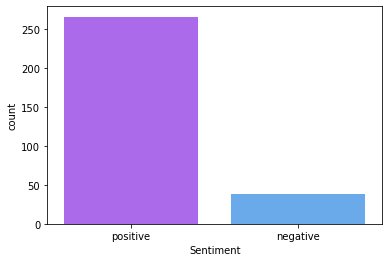

In [14]:
sns.countplot(reviews1.Sentiment,palette='cool_r') 

In [15]:
reviews1.loc[reviews1.Sentiment=='negative'].rating.value_counts() 
#There are some negative comments with 4  stars which is flawed
#Lets have a look at those values

4.0    38
Name: rating, dtype: int64

# Word Cloud

In [16]:
review_str = ' '.join(reviews1['title'].tolist()) 

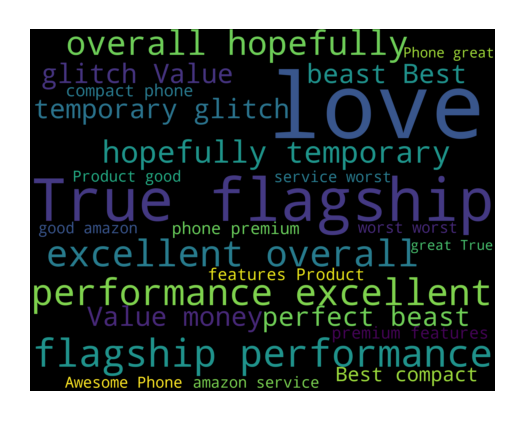

In [20]:
#Creating a WordCloud
from matplotlib.pyplot import figure
wordcloud_ip = WordCloud(
                      background_color="black", max_words=500,
               width=1800, height=1400).generate(review_str)
figure(figsize=(2,3), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

In [18]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  

# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

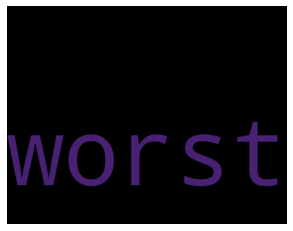

In [19]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in review_str.split() if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                     background_color='black',
                     width=1800,
                     height=1400
                    ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

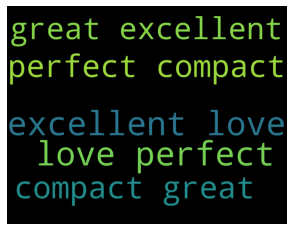

In [21]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in review_str.split() if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                     background_color='black',  width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

Conclusion:Perfomed Sentiment Analysis for a Samsung Phone.Cleaned data during preprocessing and removed stopwords.Developed word clouds for dataset and for positive and negative words.